In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [64]:
dems = pd.read_csv('data/fivethirtyeight/dem_candidates.csv')
reps = pd.read_csv('data/fivethirtyeight/rep_candidates.csv', encoding = 'ISO-8859-1')
dems.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', 'EMILY's List', 'Justice Dems',
       'Indivisible', 'PCCC', 'Our Revolution', 'Sunrise', 'Sanders', 'AOC',
       'Party Committee'],
      dtype='object')

In [73]:
dems['District'] = dems['District'].replace('At-Large', '1')
reps['District'] = reps['District'].replace('At-Large', '1')

In [66]:
dems['District'].value_counts()

1     96
2     77
4     67
3     66
10    50
6     48
7     46
5     44
8     36
13    28
12    25
11    23
9     23
15    18
17    15
14    14
16    13
30    12
23    11
21    11
27     9
34     9
37     9
20     8
24     7
28     7
22     7
42     6
32     6
35     6
18     6
19     5
25     4
26     4
38     4
33     3
36     3
29     3
31     2
41     2
43     2
44     2
46     2
48     2
49     2
50     2
52     2
39     1
40     1
45     1
47     1
51     1
Name: District, dtype: int64

In [74]:
districts = pd.read_csv('data/districts.csv')

districts

def make_list(row):
    return [row.State + str(i) for i in np.arange(1, row['# Districts'] + 1)]

nested = districts.apply(make_list, axis=1)
nested

0     [Alabama1, Alabama2, Alabama3, Alabama4, Alaba...
1                                             [Alaska1]
2     [Arizona1, Arizona2, Arizona3, Arizona4, Arizo...
3          [Arkansas1, Arkansas2, Arkansas3, Arkansas4]
4     [California1, California2, California3, Califo...
5     [Colorado1, Colorado2, Colorado3, Colorado4, C...
6     [Connecticut1, Connecticut2, Connecticut3, Con...
7                                           [Delaware1]
8     [Florida1, Florida2, Florida3, Florida4, Flori...
9     [Georgia1, Georgia2, Georgia3, Georgia4, Georg...
10                                   [Hawaii1, Hawaii2]
11                                     [Idaho1, Idaho2]
12    [Illinois1, Illinois2, Illinois3, Illinois4, I...
13    [Indiana1, Indiana2, Indiana3, Indiana4, India...
14                         [Iowa1, Iowa2, Iowa3, Iowa4]
15                 [Kansas1, Kansas2, Kansas3, Kansas4]
16    [Kentucky1, Kentucky2, Kentucky3, Kentucky4, K...
17    [Louisiana1, Louisiana2, Louisiana3, Louis

In [68]:
dems['IncumbentBin'] = dems['Incumbent'].map({'No': 0, 'Yes': 1})
reps['IncumbentBin'] = reps['Incumbent'].map({'No': 0, 'Yes': 1})
dems['Fullname'] = dems['State'] + dems['District']
reps['Fullname'] = reps['State'] + reps['District']

demincdists = dems[dems['Incumbent'] == 'Yes']['Fullname'].unique()
demchadists = dems[dems['Incumbent'] == 'No']['Fullname'].unique()

repincdists = reps[reps['Incumbent'] == 'Yes']['Fullname'].unique()
repchadists = reps[reps['Incumbent'] == 'No']['Fullname'].unique()

demincs = dems[dems['Fullname'].isin(demincdists)]
demchas = dems[dems['Fullname'].isin(demchadists)]

repincs = reps[reps['Fullname'].isin(repincdists)]
repchas = reps[reps['Fullname'].isin(repchadists)]

deminccounts = demincs[['Fullname', 'Candidate']].groupby('Fullname').count()
demchacounts = demchas[['Fullname', 'Candidate']].groupby('Fullname').count()
deminccounts['Type'] = 'Incumbent'
demchacounts['Type'] = 'Challenger'

demalls = pd.concat([deminccounts, demchacounts]).reset_index()
demalls['Party'] = 'Democratic'

repinccounts = repincs[['Fullname', 'Candidate']].groupby('Fullname').count()
repchacounts = repchas[['Fullname', 'Candidate']].groupby('Fullname').count()
repinccounts['Type'] = 'Incumbent'
repchacounts['Type'] = 'Challenger'

repalls = pd.concat([repinccounts, repchacounts]).reset_index()
repalls['Party'] = 'Republican'

alls = pd.concat([demalls, repalls])
alls = alls.reset_index()
alls

incs = alls[alls['Type'] == 'Incumbent']
chas = alls[alls['Type'] == 'Challenger']

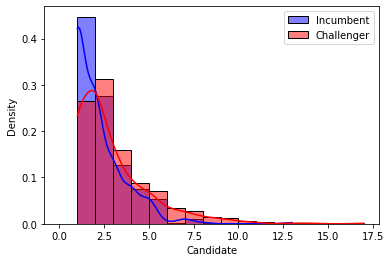

In [69]:
bins = np.arange(0, 18)

sns.histplot(incs, x='Candidate', stat='density', bins=bins, palette='tab10', alpha=0.5, kde=True, color='blue', label='Incumbent')
sns.histplot(chas, x='Candidate', stat='density', bins=bins, palette='tab10', alpha=0.5, kde=True, color='red', label='Challenger')
plt.legend();

In [58]:
allcounts

,Fullname,Candidate,Type
0,Alabama1,1,Incumbent
1,Alabama2,3,Incumbent
2,Alabama3,3,Incumbent
3,Alabama4,3,Incumbent
4,Alabama6,1,Incumbent
...,...,...,...
777,Wisconsin5,2,Challenger
778,Wisconsin6,2,Challenger
779,Wisconsin7,3,Challenger
780,Wisconsin8,2,Challenger
